# IF3170 Artificial Intelligence | Tugas Besar 2

Group Number: 02 (K03)

Group Members:
- Ahmad Wafi Idzharulhaqq (13523131)
- Amira Izani (13523143)
- Frederiko Eldad Mugiyono (13523147)
- Natalia Desiany Nursimin (13523157)
- I Made Wiweka Putera (13523160)

## Import Libraries

In [20]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
from datetime import datetime, timezone
from joblib import Parallel, delayed

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

sys.path.append(os.path.join(os.getcwd(), 'src'))

from src.preprocessing import (
    run_full_pipeline, load_data, remove_duplicates, 
    extract_and_drop_ids, encode_target, split_train_val,
    impute_missing_values, handle_outliers, standardize_features,
    SMOTEScratch
)
from src.dtl_scratch import DecisionTreeScratch
from src.linear_models import LogisticRegression, OneVsAll
from src.svm_scratch import SVMScratch

import matplotlib.pyplot as plt

print("Libraries imported successfully!")
print(f"Random seed set to: {RANDOM_SEED}")

Libraries imported successfully!
Random seed set to: 42


## Import Dataset

In [21]:
def load_processed_data():
    try:
        base_path = os.path.join(os.getcwd(), 'data', 'processed')
        X_train = np.load(os.path.join(base_path, 'X_train.npy'))
        y_train = np.load(os.path.join(base_path, 'y_train.npy'))
        X_test_kaggle = np.load(os.path.join(base_path, 'X_test_kaggle.npy'))
        test_ids = np.load(os.path.join(base_path, 'test_ids.npy'))
        print(f"Data Loaded. Train shape: {X_train.shape}")
        return X_train, y_train, X_test_kaggle, test_ids
    except FileNotFoundError:
        print("Error: Processed data not found. Running preprocessing pipeline...")
        return None, None, None, None

print("=" * 60)
print("[1] Running Preprocessing Pipeline...")
print("=" * 60)
run_full_pipeline()

X_train, y_train, X_test_kaggle, test_ids = load_processed_data()

[1] Running Preprocessing Pipeline...
STARTING REFACTORED PIPELINE (One-Hot + CPU)
Loaded train shape: (3096, 38)
Loaded test shape: (1328, 37)
Removed 0 duplicate rows.
ID column found: 'Student_ID'. Extracting and dropping.
Derived features added: 23 new features including academic, socioeconomic, demographic, and interaction features.
Derived features added: 23 new features including academic, socioeconomic, demographic, and interaction features.
One-Hot Encoding Cols (9): ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation"]
Features encoded. New feature count: 263
Missing values imputed using mean.
Outliers clipped at 1th and 99th percentile.
Features standardized using Z-score.

=== Feature Selection (Threshold: 0.95) ===
Dropping 147 constant features.
Dropping 6 highly correlated features (> 0.95).
Features reduced from 263 to 110.
All files save

# Exploratory Data Analysis (Optional)

# 1. Split Training Set and Validation Set

In [22]:
print("Data splitting: Handled by preprocessing pipeline")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")

Data splitting: Handled by preprocessing pipeline
  X_train shape: (2476, 110)
  y_train shape: (2476,)


# 2. Data Cleaning and Preprocessing

### I. Handling Missing Data

1. **Data Imputation:**

2. **Deletion of Missing Data:**

3. **Domain-Specific Strategies:**

4. **Imputation Libraries:**

In [23]:
# Missing data handling is done in run_full_pipeline()
print("Missing values in processed data:")
print(f"  X_train: {np.isnan(X_train).sum()}")
print(f"  X_test_kaggle: {np.isnan(X_test_kaggle).sum()}")
print("\nMissing values were imputed using mean (fit on training data only)")

Missing values in processed data:
  X_train: 0
  X_test_kaggle: 0

Missing values were imputed using mean (fit on training data only)


### II. Dealing with Outliers

In [24]:
# Outlier handling is done in run_full_pipeline()
print("Outliers handled using clipping method")
print(f"Values clipped at 1st and 99th percentiles (calculated from training data)")

Outliers handled using clipping method
Values clipped at 1st and 99th percentiles (calculated from training data)


### III. Remove Duplicates

In [25]:
# Duplicate removal is done in run_full_pipeline()
print("Duplicate handling: Done in preprocessing pipeline")
print("Duplicates were removed before saving processed data")

Duplicate handling: Done in preprocessing pipeline
Duplicates were removed before saving processed data


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [26]:
print("Feature Engineering Notes:")
print("=" * 60)
print("The dataset contains pre-engineered features including:")
print("  - Academic performance metrics")
print("  - Demographic information")
print("  - Socioeconomic indicators")
print("\nNo additional feature creation needed for baseline models.")
print("Tree-based models can capture non-linear relationships automatically.")

Feature Engineering Notes:
The dataset contains pre-engineered features including:
  - Academic performance metrics
  - Demographic information
  - Socioeconomic indicators

No additional feature creation needed for baseline models.
Tree-based models can capture non-linear relationships automatically.


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [27]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [28]:
# Feature scaling is done in run_full_pipeline()
print("Feature scaling applied (Z-score standardization)")
print(f"  Mean of X_train (should be ~0): {X_train.mean():.6f}")
print(f"  Std of X_train (should be ~1): {X_train.std():.6f}")

Feature scaling applied (Z-score standardization)
  Mean of X_train (should be ~0): -0.000000
  Std of X_train (should be ~1): 1.000000


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [29]:
print("Target Encoding (done in preprocessing):")
print("  Dropout  -> 0")
print("  Enrolled -> 1")
print("  Graduate -> 2")
print(f"\nUnique values in y_train: {np.unique(y_train)}")
print(f"Class distribution in y_train: {np.bincount(y_train)}")

Target Encoding (done in preprocessing):
  Dropout  -> 0
  Enrolled -> 1
  Graduate -> 2

Unique values in y_train: [0 1 2]
Class distribution in y_train: [ 794  432 1250]


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [30]:
def smote_oversampling(X, y, k_neighbors=5, random_state=42):
    smote = SMOTEScratch(k_neighbors=k_neighbors, random_state=random_state)
    return smote.fit_resample(X, y)

print("=" * 60)
print("APPLYING SMOTE OVERSAMPLING")
print("=" * 60)

class_names = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}

print(f"\nClass distribution BEFORE SMOTE:")
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u} ({class_names[u]}): {c} samples ({c/len(y_train)*100:.1f}%)")

X_train_bal, y_train_bal = smote_oversampling(X_train, y_train, k_neighbors=5, random_state=RANDOM_SEED)

print(f"\nClass distribution AFTER SMOTE:")
unique, counts = np.unique(y_train_bal, return_counts=True)
for u, c in zip(unique, counts):
    print(f"  Class {u} ({class_names[u]}): {c} samples ({c/len(y_train_bal)*100:.1f}%)")

print(f"\nDataset size: {len(y_train)} -> {len(y_train_bal)}")

APPLYING SMOTE OVERSAMPLING

Class distribution BEFORE SMOTE:
  Class 0 (Dropout): 794 samples (32.1%)
  Class 1 (Enrolled): 432 samples (17.4%)
  Class 2 (Graduate): 1250 samples (50.5%)

Class distribution AFTER SMOTE:
  Class 0 (Dropout): 1250 samples (33.3%)
  Class 1 (Enrolled): 1250 samples (33.3%)
  Class 2 (Graduate): 1250 samples (33.3%)

Dataset size: 2476 -> 3750


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [31]:
print("Data Normalization Verification:")
print(f"  X_train mean per feature (first 5): {X_train.mean(axis=0)[:5]}")
print(f"  X_train std per feature (first 5): {X_train.std(axis=0)[:5]}")
print("\nData is normalized with mean ≈ 0 and std ≈ 1")

Data Normalization Verification:
  X_train mean per feature (first 5): [ 7.17430064e-18 -1.30572272e-16  8.46567476e-17  3.34322410e-16
  3.58715032e-17]
  X_train std per feature (first 5): [1. 1. 1. 1. 1.]

Data is normalized with mean ≈ 0 and std ≈ 1


### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [32]:
print("Dimensionality Reduction:")
print(f"  Number of features: {X_train.shape[1]}")
print("  Decision: NOT applying PCA")
print(f"  Reason: {X_train.shape[1]} features is manageable, and we want interpretability")

Dimensionality Reduction:
  Number of features: 110
  Decision: NOT applying PCA
  Reason: 110 features is manageable, and we want interpretability


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [33]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [34]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [35]:
print("=" * 60)
print("PREPROCESSING PIPELINE SUMMARY")
print("=" * 60)
print("1. Loaded raw data")
print("2. Removed duplicates")
print("3. Encoded target (Dropout->0, Enrolled->1, Graduate->2)")
print("4. Imputed missing values (mean, fit on train)")
print("5. Handled outliers (clipping at 1st/99th percentile)")
print("6. Standardized features (Z-score, fit on train)")
print("7. Applied SMOTE for class balancing")
print("=" * 60)

print(f"\nFinal shapes:")
print(f"  X_train (original): {X_train.shape}")
print(f"  X_train_bal (SMOTE): {X_train_bal.shape}")
print(f"  y_train_bal: {y_train_bal.shape}")
print(f"  X_test_kaggle: {X_test_kaggle.shape}")

PREPROCESSING PIPELINE SUMMARY
1. Loaded raw data
2. Removed duplicates
3. Encoded target (Dropout->0, Enrolled->1, Graduate->2)
4. Imputed missing values (mean, fit on train)
5. Handled outliers (clipping at 1st/99th percentile)
6. Standardized features (Z-score, fit on train)
7. Applied SMOTE for class balancing

Final shapes:
  X_train (original): (2476, 110)
  X_train_bal (SMOTE): (3750, 110)
  y_train_bal: (3750,)
  X_test_kaggle: (1328, 110)


In [36]:
def k_fold_cross_validation(model_class, params, X, y, k=5, use_smote=True):
    np.random.seed(RANDOM_SEED)
    
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    accuracies = []
    
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size
        val_idx = indices[start:end]
        train_idx = np.concatenate([indices[:start], indices[end:]])
        
        X_fold_train_raw, y_fold_train_raw = X[train_idx], y[train_idx]
        X_fold_val, y_fold_val = X[val_idx], y[val_idx]

        if use_smote:
            X_fold_train_bal, y_fold_train_bal = smote_oversampling(
                X_fold_train_raw, y_fold_train_raw, 
                k_neighbors=5, random_state=RANDOM_SEED + i
            )
        else:
            X_fold_train_bal, y_fold_train_bal = X_fold_train_raw, y_fold_train_raw
        
        model = model_class(**params)
        
        if model_class == DecisionTreeScratch:
            np.random.seed(RANDOM_SEED + i)
            n_prune = int(0.15 * len(X_fold_train_bal))
            prune_idx = np.random.choice(len(X_fold_train_bal), n_prune, replace=False)
            train_mask = np.ones(len(X_fold_train_bal), dtype=bool)
            train_mask[prune_idx] = False
            
            X_prune = X_fold_train_bal[prune_idx]
            y_prune = y_fold_train_bal[prune_idx]
            X_train_final = X_fold_train_bal[train_mask]
            y_train_final = y_fold_train_bal[train_mask]
            
            model.fit(X_train_final, y_train_final, X_val=X_prune, y_val=y_prune)
        else:
            model.fit(X_fold_train_bal, y_fold_train_bal)
        
        preds = model.predict(X_fold_val)
        acc = np.mean(preds == y_fold_val)
        accuracies.append(acc)
    
    return np.mean(accuracies), np.std(accuracies)

print("K-Fold Cross Validation function defined.")
print("  - Uses 5-fold CV by default")
print("  - SMOTE applied INSIDE each fold (no data leakage)")
print("  - Special pruning handling for Decision Trees")

K-Fold Cross Validation function defined.
  - Uses 5-fold CV by default
  - SMOTE applied INSIDE each fold (no data leakage)
  - Special pruning handling for Decision Trees


In [37]:
import itertools

def grid_search(model_class, param_grid, X, y, k=5, n_jobs=2):
    keys = list(param_grid.keys())
    values = list(param_grid.values())
    combinations = list(itertools.product(*values))
    
    print(f"Grid Search: Testing {len(combinations)} combinations with {k}-fold CV...")
    
    def run_one_combo(combo):
        params = dict(zip(keys, combo))
        try:
            mean_score, std_score = k_fold_cross_validation(model_class, params, X, y, k=k)
            return (params, mean_score, std_score)
        except Exception as e:
            print(f"Error with params {params}: {e}")
            return (params, -1, 0)

    results = Parallel(n_jobs=n_jobs, verbose=5)(
        delayed(run_one_combo)(c) for c in combinations
    )
    
    best_result = max(results, key=lambda x: x[1])
    best_params, best_score, best_std = best_result
    
    print(f"\nBest Params: {best_params}")
    print(f"Best CV Score: {best_score:.4f} (+/- {best_std:.4f})")
    
    return best_params, best_score, best_std

print("Grid Search function defined.")
print("  - Uses parallel processing (n_jobs=2)")
print("  - Returns best parameters, CV score, and std")

Grid Search function defined.
  - Uses parallel processing (n_jobs=2)
  - Returns best parameters, CV score, and std


In [38]:
QUICK_MODE = True

if QUICK_MODE:
    print("=" * 60)
    print("QUICK MODE - Using minimal grids for fast testing")
    print("=" * 60)
    
    dtl_grid = {
        'max_depth': [15],
        'min_samples_split': [10],
        'min_samples_leaf': [3],
        'criterion': ['entropy'],
        'min_impurity_decrease': [0.001],
        'class_weight': ['balanced'],
    }
    
    lr_grid = {
        'model_class': [LogisticRegression],
        'learning_rate': [0.01],
        'n_iterations': [1000],
        'batch_size': [32],
        'lambda_reg': [0.01],
        'decay_rate': [0.001],
    }
    
    svm_grid = {
        'learning_rate': [0.01],
        'lambda_param': [0.01],
        'n_iters': [1000],
        'batch_size': [32],
        'lr_decay': [True],
        'early_stopping': [True],
        'patience': [50]
    }
else:
    print("=" * 60)
    print("FULL MODE - Expanded grids (this will take longer)")
    print("=" * 60)
    
    dtl_grid = {
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5],
        'criterion': ['gini', 'entropy'],
        'min_impurity_decrease': [0.0, 0.001],
        'class_weight': ['balanced'],
    }
    
    lr_grid = {
        'model_class': [LogisticRegression],
        'learning_rate': [0.005, 0.01, 0.05],
        'n_iterations': [500, 1000],
        'batch_size': [32, 64],
        'lambda_reg': [0.001, 0.01, 0.1],
        'decay_rate': [0.0, 0.001],
    }
    
    svm_grid = {
        'learning_rate': [0.005, 0.01],
        'lambda_param': [0.01, 0.1],
        'n_iters': [1000, 2000],
        'batch_size': [32],
        'lr_decay': [True],
        'early_stopping': [True],
        'patience': [30, 50]
    }

print(f"\nDTL Grid: {len(list(itertools.product(*dtl_grid.values())))} combinations")
print(f"LogReg Grid: {len(list(itertools.product(*lr_grid.values())))} combinations")
print(f"SVM Grid: {len(list(itertools.product(*svm_grid.values())))} combinations")

QUICK MODE - Using minimal grids for fast testing

DTL Grid: 1 combinations
LogReg Grid: 1 combinations
SVM Grid: 1 combinations


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. DTL

In [39]:
print("=" * 60)
print("DECISION TREE CLASSIFIER")
print("=" * 60)


print("\n[Grid Search]")
best_dtl_params, best_dtl_cv, best_dtl_std = grid_search(
    DecisionTreeScratch, dtl_grid, X_train, y_train, k=5, n_jobs=2
)

print(f"\n>>> Best DTL CV Score: {best_dtl_cv:.4f} (+/- {best_dtl_std:.4f})")

print("\n[Training Final Model]")
np.random.seed(RANDOM_SEED)
dtl_model = DecisionTreeScratch(**best_dtl_params)

n_prune = int(0.15 * len(X_train_bal))
prune_idx = np.random.choice(len(X_train_bal), n_prune, replace=False)
train_mask = np.ones(len(X_train_bal), dtype=bool)
train_mask[prune_idx] = False

X_prune = X_train_bal[prune_idx]
y_prune = y_train_bal[prune_idx]
X_train_dtl = X_train_bal[train_mask]
y_train_dtl = y_train_bal[train_mask]

dtl_model.fit(X_train_dtl, y_train_dtl, X_val=X_prune, y_val=y_prune)

dtl_preds = dtl_model.predict(X_train)
dtl_accuracy = np.mean(dtl_preds == y_train)

print(f"\nDecision Tree Results:")
print(f"  Best Params: {best_dtl_params}")
print(f"  CV Score: {best_dtl_cv:.4f}")
print(f"  Tree Depth: {dtl_model.get_depth()}")
print(f"  Number of Leaves: {dtl_model.get_n_leaves()}")
print(f"  Training Accuracy: {dtl_accuracy:.4f}")

print("\nPer-class Performance:")
for cls in [0, 1, 2]:
    mask = y_train == cls
    if mask.sum() > 0:
        cls_acc = np.mean(dtl_preds[mask] == y_train[mask])
        print(f"  {class_names[cls]}: {cls_acc:.4f}")

DECISION TREE CLASSIFIER

[Grid Search]
Grid Search: Testing 1 combinations with 5-fold CV...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.



Best Params: {'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'entropy', 'min_impurity_decrease': 0.001, 'class_weight': 'balanced'}
Best CV Score: 0.7095 (+/- 0.0228)

>>> Best DTL CV Score: 0.7095 (+/- 0.0228)

[Training Final Model]

Decision Tree Results:
  Best Params: {'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'entropy', 'min_impurity_decrease': 0.001, 'class_weight': 'balanced'}
  CV Score: 0.7095
  Tree Depth: 15
  Number of Leaves: 119
  Training Accuracy: 0.8526

Per-class Performance:
  Dropout: 0.8237
  Enrolled: 0.6829
  Graduate: 0.9296


## B. Logistic Regression

In [40]:
print("=" * 60)
print("LOGISTIC REGRESSION (One-vs-All)")
print("=" * 60)

print("\n[Grid Search]")
best_lr_params, best_lr_cv, best_lr_std = grid_search(
    OneVsAll, lr_grid, X_train, y_train, k=5, n_jobs=2
)

print(f"\n>>> Best LogReg CV Score: {best_lr_cv:.4f} (+/- {best_lr_std:.4f})")

print("\n[Training Final Model]")
np.random.seed(RANDOM_SEED)
lr_model = OneVsAll(**best_lr_params)
lr_model.fit(X_train_bal, y_train_bal)

lr_preds = lr_model.predict(X_train)
lr_accuracy = np.mean(lr_preds == y_train)

print(f"\nLogistic Regression Results:")
print(f"  Best Params: {best_lr_params}")
print(f"  CV Score: {best_lr_cv:.4f}")
print(f"  Training Accuracy: {lr_accuracy:.4f}")

print("\nPer-class Performance:")
for cls in [0, 1, 2]:
    mask = y_train == cls
    if mask.sum() > 0:
        cls_acc = np.mean(lr_preds[mask] == y_train[mask])
        print(f"  {class_names[cls]}: {cls_acc:.4f}")

LOGISTIC REGRESSION (One-vs-All)

[Grid Search]
Grid Search: Testing 1 combinations with 5-fold CV...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.



Best Params: {'model_class': <class 'src.linear_models.LogisticRegression'>, 'learning_rate': 0.01, 'n_iterations': 1000, 'batch_size': 32, 'lambda_reg': 0.01, 'decay_rate': 0.001}
Best CV Score: 0.7527 (+/- 0.0098)

>>> Best LogReg CV Score: 0.7527 (+/- 0.0098)

[Training Final Model]

Logistic Regression Results:
  Best Params: {'model_class': <class 'src.linear_models.LogisticRegression'>, 'learning_rate': 0.01, 'n_iterations': 1000, 'batch_size': 32, 'lambda_reg': 0.01, 'decay_rate': 0.001}
  CV Score: 0.7527
  Training Accuracy: 0.7839

Per-class Performance:
  Dropout: 0.7670
  Enrolled: 0.6389
  Graduate: 0.8448


## C. SVM

In [41]:
print("=" * 60)
print("SUPPORT VECTOR MACHINE (One-vs-All)")
print("=" * 60)

print("\n[Grid Search]")
best_svm_params, best_svm_cv, best_svm_std = grid_search(
    SVMScratch, svm_grid, X_train, y_train, k=5, n_jobs=2
)

print(f"\n>>> Best SVM CV Score: {best_svm_cv:.4f} (+/- {best_svm_std:.4f})")

print("\n[Training Final Model]")
np.random.seed(RANDOM_SEED)
svm_model = SVMScratch(**best_svm_params)
svm_model.fit(X_train_bal, y_train_bal)

svm_preds = svm_model.predict(X_train)
svm_accuracy = np.mean(svm_preds == y_train)

print(f"\nSVM Results:")
print(f"  Best Params: {best_svm_params}")
print(f"  CV Score: {best_svm_cv:.4f}")
print(f"  Training Accuracy: {svm_accuracy:.4f}")

print("\nPer-class Performance:")
for cls in [0, 1, 2]:
    mask = y_train == cls
    if mask.sum() > 0:
        cls_acc = np.mean(svm_preds[mask] == y_train[mask])
        print(f"  {class_names[cls]}: {cls_acc:.4f}")

if hasattr(svm_model, 'get_training_summary'):
    summary = svm_model.get_training_summary()
    print("\nSVM Training Summary:")
    for cls, stats in summary.items():
        print(f"  {class_names.get(cls, cls)}: Epochs={stats['epochs_trained']}, "
              f"Best Acc={stats['best_accuracy']:.4f}")

SUPPORT VECTOR MACHINE (One-vs-All)

[Grid Search]
Grid Search: Testing 1 combinations with 5-fold CV...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


SVM untuk 3 kelas: [0 1 2]
  Training classifier for class 0... Done! (Epochs: 469, Acc: 0.8897)
  Training classifier for class 1... Done! (Epochs: 542, Acc: 0.7918)
  Training classifier for class 2... Done! (Epochs: 463, Acc: 0.8873)
SVM untuk 3 kelas: [0 1 2]
  Training classifier for class 0... Done! (Epochs: 433, Acc: 0.8931)
  Training classifier for class 1... Done! (Epochs: 475, Acc: 0.7973)
  Training classifier for class 2... Done! (Epochs: 522, Acc: 0.8874)
SVM untuk 3 kelas: [0 1 2]
  Training classifier for class 0... Done! (Epochs: 471, Acc: 0.9057)
  Training classifier for class 1... Done! (Epochs: 677, Acc: 0.8103)
  Training classifier for class 2... Done! (Epochs: 705, Acc: 0.8891)
SVM untuk 3 kelas: [0 1 2]
  Training classifier for class 0... Done! (Epochs: 406, Acc: 0.8918)
  Training classifier for class 1... Done! (Epochs: 499, Acc: 0.7924)
  Training classifier for class 2... Done! (Epochs: 740, Acc: 0.8804)
SVM untuk 3 kelas: [0 1 2]
  Training classifier for

In [42]:
print("=" * 60)
print("GRID SEARCH RESULTS SUMMARY")
print("=" * 60)

cv_scores = {
    "Decision Tree": (best_dtl_cv, best_dtl_std),
    "Logistic Regression": (best_lr_cv, best_lr_std),
    "SVM": (best_svm_cv, best_svm_std),
}

print(f"\n{'Model':<25} {'CV Score':<15} {'Std':<10}")
print("-" * 50)
for name, (score, std) in cv_scores.items():
    print(f"{name:<25} {score:<15.4f} {std:<10.4f}")
print("-" * 50)

winner_name = max(cv_scores, key=lambda x: cv_scores[x][0])
print(f"\n>>> WINNER (by CV): {winner_name} ({cv_scores[winner_name][0]:.4f})")

results = {
    'Decision Tree': dtl_accuracy,
    'Logistic Regression': lr_accuracy,
    'SVM': svm_accuracy
}

best_model_name = max(results, key=results.get)

GRID SEARCH RESULTS SUMMARY

Model                     CV Score        Std       
--------------------------------------------------
Decision Tree             0.7095          0.0228    
Logistic Regression       0.7527          0.0098    
SVM                       0.7479          0.0103    
--------------------------------------------------

>>> WINNER (by CV): Logistic Regression (0.7527)


## D. SKLearn

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC

print("=" * 60)
print("SKLEARN COMPARISON")
print("=" * 60)

print("\n--- Decision Tree (sklearn) ---")
sklearn_dtl = DecisionTreeClassifier(
    max_depth=best_dtl_params.get('max_depth', 15),
    min_samples_split=best_dtl_params.get('min_samples_split', 10),
    min_samples_leaf=best_dtl_params.get('min_samples_leaf', 3),
    criterion=best_dtl_params.get('criterion', 'entropy'),
    class_weight=best_dtl_params.get('class_weight', 'balanced'),
    random_state=RANDOM_SEED
)
sklearn_dtl.fit(X_train_bal, y_train_bal)
sklearn_dtl_preds = sklearn_dtl.predict(X_train)
sklearn_dtl_acc = np.mean(sklearn_dtl_preds == y_train)

print(f"  Sklearn DTL Accuracy: {sklearn_dtl_acc:.4f}")
print(f"  Scratch DTL Accuracy: {dtl_accuracy:.4f}")
print(f"  Difference: {abs(sklearn_dtl_acc - dtl_accuracy):.4f}")

print("\n--- Logistic Regression (sklearn) ---")
sklearn_lr = SklearnLogReg(
    C=1.0 / best_lr_params.get('lambda_reg', 0.01),
    max_iter=best_lr_params.get('n_iterations', 1000),
    solver='lbfgs',
    multi_class='ovr',
    random_state=RANDOM_SEED
)
sklearn_lr.fit(X_train_bal, y_train_bal)
sklearn_lr_preds = sklearn_lr.predict(X_train)
sklearn_lr_acc = np.mean(sklearn_lr_preds == y_train)

print(f"  Sklearn LogReg Accuracy: {sklearn_lr_acc:.4f}")
print(f"  Scratch LogReg Accuracy: {lr_accuracy:.4f}")
print(f"  Difference: {abs(sklearn_lr_acc - lr_accuracy):.4f}")

print("\n--- SVM (sklearn) ---")
sklearn_svm = SVC(
    kernel='linear',
    C=1.0 / best_svm_params.get('lambda_param', 0.01),
    decision_function_shape='ovr',
    random_state=RANDOM_SEED
)
sklearn_svm.fit(X_train_bal, y_train_bal)
sklearn_svm_preds = sklearn_svm.predict(X_train)
sklearn_svm_acc = np.mean(sklearn_svm_preds == y_train)

print(f"  Sklearn SVM Accuracy: {sklearn_svm_acc:.4f}")
print(f"  Scratch SVM Accuracy: {svm_accuracy:.4f}")
print(f"  Difference: {abs(sklearn_svm_acc - svm_accuracy):.4f}")

print("\n" + "=" * 60)
print("COMPARISON SUMMARY")
print("=" * 60)
print(f"{'Model':<25} {'Scratch':<12} {'Sklearn':<12} {'Diff':<10}")
print("-" * 60)
print(f"{'Decision Tree':<25} {dtl_accuracy:<12.4f} {sklearn_dtl_acc:<12.4f} {abs(sklearn_dtl_acc - dtl_accuracy):<10.4f}")
print(f"{'Logistic Regression':<25} {lr_accuracy:<12.4f} {sklearn_lr_acc:<12.4f} {abs(sklearn_lr_acc - lr_accuracy):<10.4f}")
print(f"{'SVM':<25} {svm_accuracy:<12.4f} {sklearn_svm_acc:<12.4f} {abs(sklearn_svm_acc - svm_accuracy):<10.4f}")
print("-" * 60)

SKLEARN COMPARISON

--- Decision Tree (sklearn) ---
  Sklearn DTL Accuracy: 0.8885
  Scratch DTL Accuracy: 0.8526
  Difference: 0.0359

--- Logistic Regression (sklearn) ---


/home/wiweka/tubes-2-ai-senku-intelligence/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


  Sklearn LogReg Accuracy: 0.7908
  Scratch LogReg Accuracy: 0.7839
  Difference: 0.0069

--- SVM (sklearn) ---
  Sklearn SVM Accuracy: 0.7960
  Scratch SVM Accuracy: 0.7827
  Difference: 0.0133

COMPARISON SUMMARY
Model                     Scratch      Sklearn      Diff      
------------------------------------------------------------
Decision Tree             0.8526       0.8885       0.0359    
Logistic Regression       0.7839       0.7908       0.0069    
SVM                       0.7827       0.7960       0.0133    
------------------------------------------------------------


## E. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

MODEL COMPARISON
  Decision Tree       : 0.8526
  Logistic Regression : 0.7839
  SVM                 : 0.7827

>>> Best Model: Decision Tree (0.8526)

--- Confusion Matrices ---


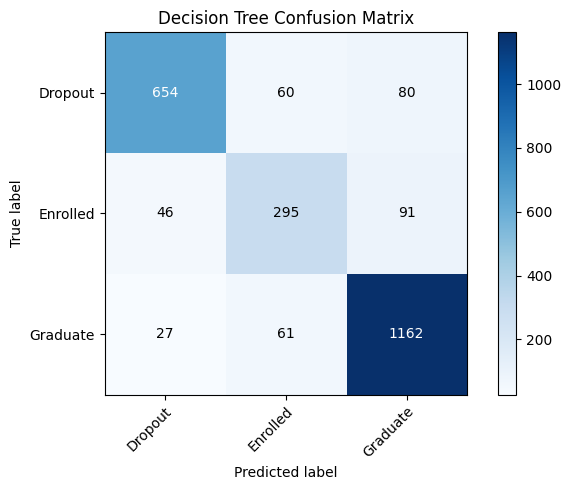

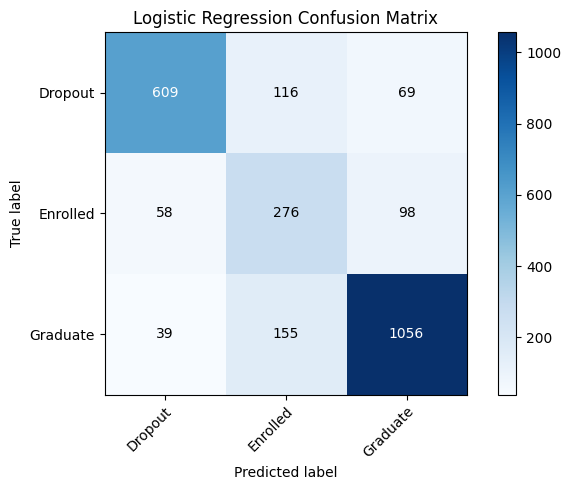

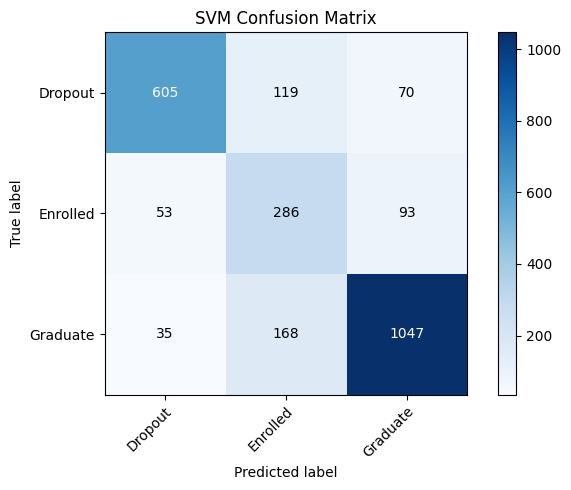

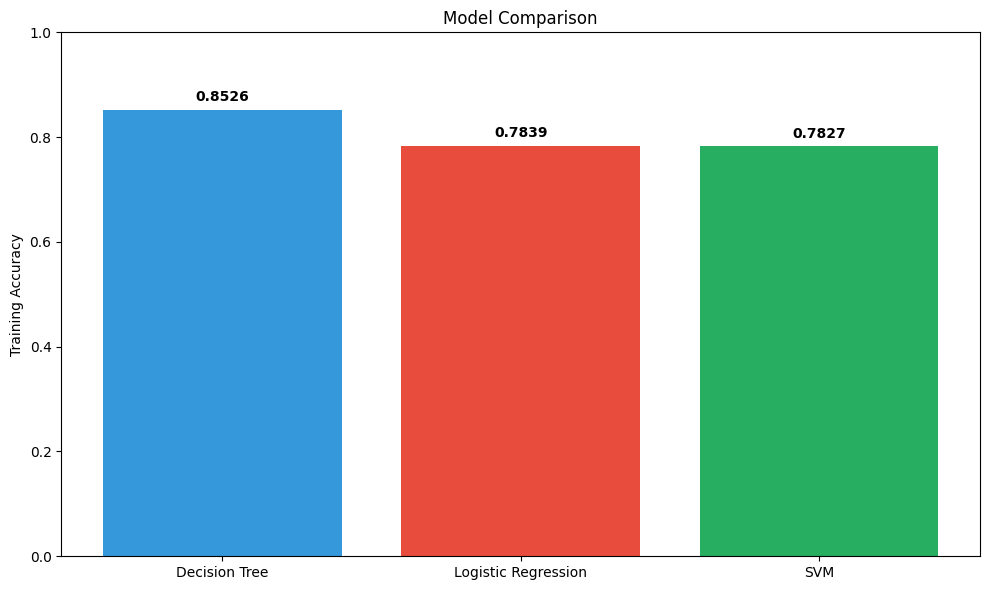

In [44]:
print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"  {name:20}: {acc:.4f}")

best_model_name = max(results, key=results.get)
print(f"\n>>> Best Model: {best_model_name} ({results[best_model_name]:.4f})")

def plot_confusion_matrix(y_true, y_pred, title, class_names_dict):
    n_classes = len(class_names_dict)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[int(t), int(p)] += 1
    
    fig, ax = plt.subplots(figsize=(7, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=list(class_names_dict.values()),
           yticklabels=list(class_names_dict.values()),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    thresh = cm.max() / 2.
    for i in range(n_classes):
        for j in range(n_classes):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    return fig

print("\n--- Confusion Matrices ---")

fig1 = plot_confusion_matrix(y_train, dtl_preds, 'Decision Tree Confusion Matrix', class_names)
plt.show()

fig2 = plot_confusion_matrix(y_train, lr_preds, 'Logistic Regression Confusion Matrix', class_names)
plt.show()

fig3 = plot_confusion_matrix(y_train, svm_preds, 'SVM Confusion Matrix', class_names)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
models = list(results.keys())
accuracies = list(results.values())
colors = ['#3498db', '#e74c3c', '#27ae60']
bars = ax.bar(models, accuracies, color=colors)
ax.set_ylabel('Training Accuracy')
ax.set_title('Model Comparison')
ax.set_ylim(0, 1)
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### SKLearn vs Scratch

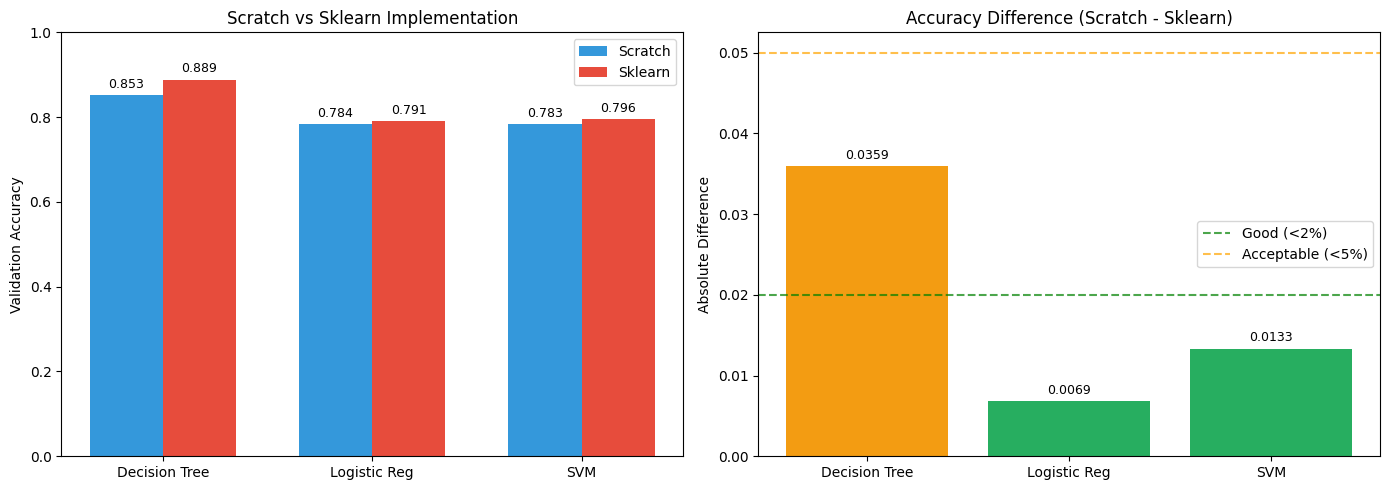


Interpretation:
  Green bars (<2%): Implementation is very close to sklearn
  Orange bars (<5%): Implementation is acceptable
  Red bars (>5%): Implementation may need improvement


In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Decision Tree', 'Logistic Reg', 'SVM']
scratch_scores = [dtl_accuracy, lr_accuracy, svm_accuracy]
sklearn_scores = [sklearn_dtl_acc, sklearn_lr_acc, sklearn_svm_acc]

x = np.arange(len(models))
width = 0.35

ax1 = axes[0]
bars1 = ax1.bar(x - width/2, scratch_scores, width, label='Scratch', color='#3498db')
bars2 = ax1.bar(x + width/2, sklearn_scores, width, label='Sklearn', color='#e74c3c')

ax1.set_ylabel('Validation Accuracy')
ax1.set_title('Scratch vs Sklearn Implementation')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 1)

for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

ax2 = axes[1]
differences = [abs(s - sk) for s, sk in zip(scratch_scores, sklearn_scores)]
colors = ['#27ae60' if d < 0.02 else '#f39c12' if d < 0.05 else '#e74c3c' for d in differences]
bars3 = ax2.bar(models, differences, color=colors)
ax2.set_ylabel('Absolute Difference')
ax2.set_title('Accuracy Difference (Scratch - Sklearn)')
ax2.axhline(y=0.02, color='green', linestyle='--', alpha=0.7, label='Good (<2%)')
ax2.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Acceptable (<5%)')
ax2.legend()

for bar in bars3:
    height = bar.get_height()
    ax2.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("  Green bars (<2%): Implementation is very close to sklearn")
print("  Orange bars (<5%): Implementation is acceptable")
print("  Red bars (>5%): Implementation may need improvement")

## F. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [46]:
print("=" * 60)
print("GENERATING KAGGLE SUBMISSION")
print("=" * 60)

if best_model_name == 'Decision Tree':
    final_model = dtl_model
elif best_model_name == 'Logistic Regression':
    final_model = lr_model
else:
    final_model = svm_model

print(f"\nUsing winning model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")

if best_model_name == 'SVM' and hasattr(final_model, 'plot_training_history'):
    print("\n[BONUS] Generating SVM Training Visualization...")
    date_str = datetime.now(timezone.utc).strftime('%Y%m%d_%H%M%S')
    try:
        os.makedirs('doc', exist_ok=True)
        plot_path = f"doc/svm_training_progress_{date_str}.png"
        final_model.plot_training_history(save_path=plot_path, show=True)
        print(f"  Saved to {plot_path}")
    except Exception as e:
        print(f"  Could not save plot: {e}")

test_preds_numeric = final_model.predict(X_test_kaggle)

reverse_map = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
test_preds_string = [reverse_map[pred] for pred in test_preds_numeric]

submission_df = pd.DataFrame({
    'Student_ID': test_ids,
    'Target': test_preds_string
})

os.makedirs('data/submit', exist_ok=True)
date_str = datetime.now(timezone.utc).strftime('%Y%m%d_%H%M%S')

print("\n" + "=" * 60)
print("Generating submissions for ALL models...")
print("=" * 60)

for name, model in [("DTL", dtl_model), ("SVM", svm_model), ("LogReg", lr_model)]:
    preds = model.predict(X_test_kaggle)
    str_preds = [reverse_map[p] for p in preds]
    df = pd.DataFrame({'Student_ID': test_ids, 'Target': str_preds})
    path = f"data/submit/submission_{name}_{date_str}.csv"
    df.to_csv(path, index=False)
    print(f"  {name}: {path}")

print("\nAll submissions saved! You can submit each to Kaggle to compare.")

GENERATING KAGGLE SUBMISSION

Using winning model: Decision Tree (Accuracy: 0.8526)

Generating submissions for ALL models...
  DTL: data/submit/submission_DTL_20251205_054223.csv
  SVM: data/submit/submission_SVM_20251205_054223.csv
  LogReg: data/submit/submission_LogReg_20251205_054223.csv

All submissions saved! You can submit each to Kaggle to compare.


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`